In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from pandas import DataFrame
from pandas import concat
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import os
import more_itertools as mit
import missingno as msno


In [152]:
house_data = pd.read_csv("/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/clean_data_v3.csv")

In [153]:
house_data.head()

,Month,DayOfWeek,HourofDay,Day,DateTime,HvacMode,Event,Schedule,T_ctrl,T_stp_heat,...,fan,Thermostat_Temperature,Thermostat_Motion,Remote_Sensor_1_Temperature,Remote_Sensor_1_Motion,T_out,RH_out,Season,timing,Date
0,1,1,0,1,2019-01-01 00:00:00,heat,Hold,Sleep,70.0,70.0,...,165.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
1,1,1,0,1,2019-01-01 00:05:00,heat,Hold,Sleep,70.0,70.0,...,135.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
2,1,1,0,1,2019-01-01 00:10:00,heat,Hold,Sleep,70.0,70.0,...,300.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
3,1,1,0,1,2019-01-01 00:15:00,heat,Hold,Sleep,70.0,70.0,...,180.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01
4,1,1,0,1,2019-01-01 00:20:00,heat,Hold,Sleep,70.0,70.0,...,120.0,70.0,0.0,67.0,0.0,41.0,95.0,Winter,Night,2019-01-01


In [154]:
house_data = house_data.drop(house_data[house_data['auxHeat1'].isnull()].index.tolist())

In [155]:
house_data = house_data[['DateTime','Month','DayOfWeek','HourofDay','Day','T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity','fan','auxHeat1']]

In [156]:
house_data.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0


In [157]:
house_data.count()

DateTime      56226
Month         56226
DayOfWeek     56226
HourofDay     56226
Day           56226
T_ctrl        56226
T_stp_heat    56226
T_out         56226
RH_out        56226
Humidity      56226
fan           56226
auxHeat1      56226
dtype: int64

In [158]:
house_data.columns

Index(['DateTime', 'Month', 'DayOfWeek', 'HourofDay', 'Day', 'T_ctrl',
       'T_stp_heat', 'T_out', 'RH_out', 'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [159]:
house_data.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0


In [160]:
house_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [161]:
house_data.Day.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [162]:
house_data.HourofDay.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [163]:
house_data.auxHeat1.unique()


array([  0.,  30., 300., 135., 210., 285.,  60., 120.,  75., 105., 195.,
        15., 165., 270.,  90., 150., 225.,  45., 255., 180., 240.])

In [164]:
house_data.auxHeat1.min()

0.0

In [165]:
house_data.auxHeat1.max()

300.0

In [166]:
house_data.count()

DateTime      56226
Month         56226
DayOfWeek     56226
HourofDay     56226
Day           56226
T_ctrl        56226
T_stp_heat    56226
T_out         56226
RH_out        56226
Humidity      56226
fan           56226
auxHeat1      56226
dtype: int64

In [167]:
house_data.count()

DateTime      56226
Month         56226
DayOfWeek     56226
HourofDay     56226
Day           56226
T_ctrl        56226
T_stp_heat    56226
T_out         56226
RH_out        56226
Humidity      56226
fan           56226
auxHeat1      56226
dtype: int64

[Text(0.5, 0, 'Target Variable Values')]

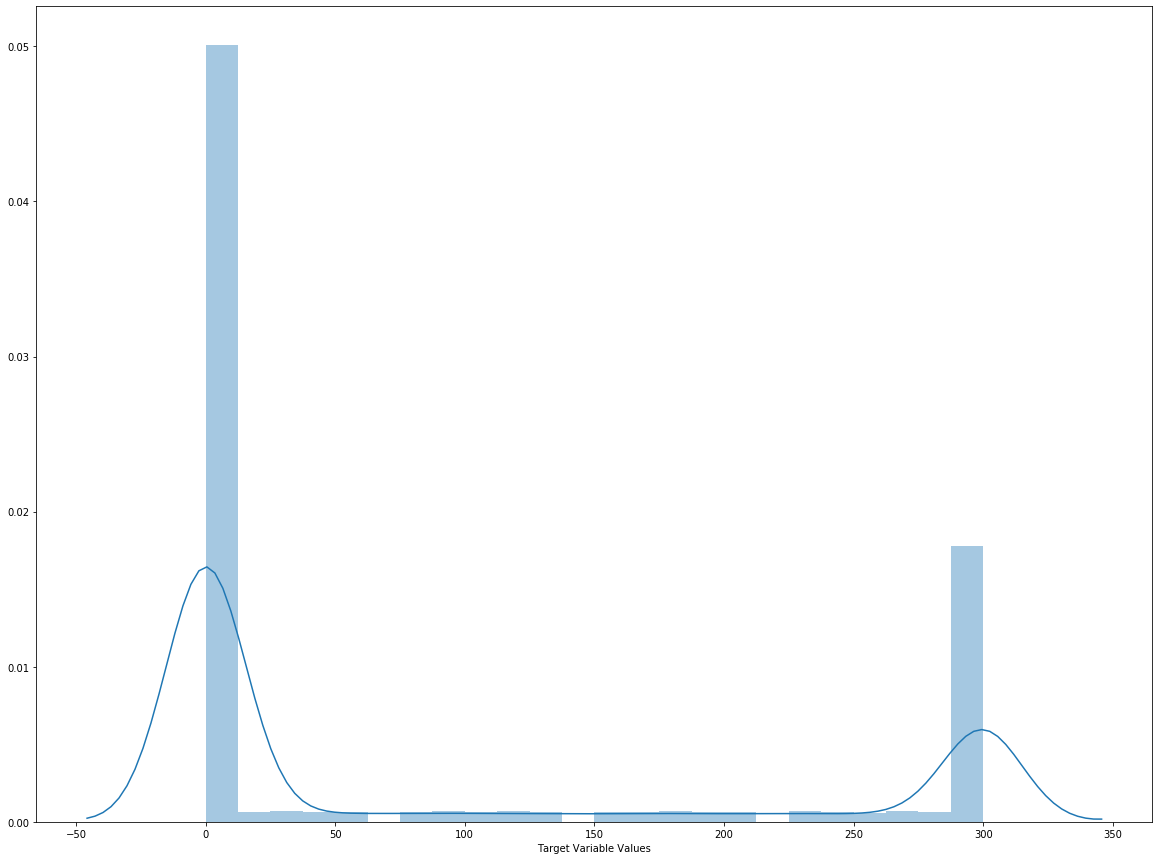

In [168]:
plt.figure(figsize = (20, 15))
ax = sns.distplot(house_data.auxHeat1)
ax.set(xlabel = 'Target Variable Values')

In [169]:
df = house_data
df.columns

Index(['DateTime', 'Month', 'DayOfWeek', 'HourofDay', 'Day', 'T_ctrl',
       'T_stp_heat', 'T_out', 'RH_out', 'Humidity', 'fan', 'auxHeat1'],
      dtype='object')

In [170]:
df

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56221,2019-12-31 23:35:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0
56222,2019-12-31 23:40:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,240.0,0.0
56223,2019-12-31 23:45:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,60.0,0.0
56224,2019-12-31 23:50:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0


In [171]:
df['combined']=df['Month'].astype(str)+'_'+df['Day'].astype(str)+'_'+df['HourofDay'].astype(str)
df

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,1_1_0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,1_1_0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,1_1_0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,1_1_0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,1_1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,2019-12-31 23:35:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,12_31_23
56222,2019-12-31 23:40:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,240.0,0.0,12_31_23
56223,2019-12-31 23:45:00,12,1,23,31,70.0,70.0,31.0,67.0,31.0,60.0,0.0,12_31_23
56224,2019-12-31 23:50:00,12,1,23,31,70.0,70.0,31.0,67.0,30.0,300.0,0.0,12_31_23


In [172]:
# def f(row):
#     if row['auxHeat1'] >= 0.0 and row['auxHeat1'] < 900.0:
#         val = 900.0
#     elif row['auxHeat1'] > 900.0 and row['auxHeat1'] < 1800.0:
#         val = 1800.0
#     elif row['auxHeat1'] > 1800.0 and row['auxHeat1'] < 2700.0:
#         val = 2700.00
#     else:
#         val = 3600.00
#     return val

In [173]:
#df['auxHeat1'] = df.apply(f, axis =1) 

In [174]:
#df['auxHeat1'].unique()

In [175]:
df.head()

,DateTime,Month,DayOfWeek,HourofDay,Day,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,2019-01-01 00:00:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,165.0,0.0,1_1_0
1,2019-01-01 00:05:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,135.0,30.0,1_1_0
2,2019-01-01 00:10:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,300.0,300.0,1_1_0
3,2019-01-01 00:15:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,180.0,135.0,1_1_0
4,2019-01-01 00:20:00,1,1,0,1,70.0,70.0,41.0,95.0,37.0,120.0,0.0,1_1_0


In [176]:
numerical_vars = ['T_ctrl', 'T_stp_heat', 'T_out', 'RH_out','Humidity','fan']
predsc = StandardScaler()
predsc.fit(df[numerical_vars])
scalar_data = predsc.transform(df[numerical_vars])

In [177]:

y_auxHeat = df[['auxHeat1']].to_numpy()
targsc = StandardScaler()
targsc.fit(y_auxHeat)
y_auxHeat = targsc.transform(y_auxHeat)

# y_auxHeat = df[['auxHeat1']].to_numpy()
# oe = OrdinalEncoder()
# y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))

In [178]:
y_auxHeat

array([[-0.69680782],
       [-0.4627674 ],
       [ 1.64359632],
       ...,
       [-0.69680782],
       [-0.69680782],
       [ 0.00531342]])

In [179]:
s=df[numerical_vars].copy()
s[numerical_vars]=scalar_data
s["auxHeat1"] = y_auxHeat
s['combined']=df['combined']
s.head(10)

,T_ctrl,T_stp_heat,T_out,RH_out,Humidity,fan,auxHeat1,combined
0,0.48126,0.590083,0.458426,1.769546,0.427681,-0.422530,-0.696808,1_1_0
1,0.48126,0.590083,0.458426,1.769546,0.427681,-0.715364,-0.462767,1_1_0
2,0.48126,0.590083,0.458426,1.769546,0.427681,0.895223,1.643596,1_1_0
3,0.48126,0.590083,0.458426,1.769546,0.427681,-0.276113,0.356374,1_1_0
4,0.48126,0.590083,0.458426,1.769546,0.427681,-0.861782,-0.696808,1_1_0
5,0.48126,0.590083,0.458426,1.769546,0.427681,0.895223,-0.696808,1_1_0
6,0.48126,0.590083,0.536885,1.842579,0.427681,-0.422530,-0.696808,1_1_0
7,0.48126,0.590083,0.536885,1.842579,0.427681,-0.715364,-0.696808,1_1_0
8,0.48126,0.590083,0.536885,1.842579,0.427681,0.895223,0.941475,1_1_0
9,0.48126,0.590083,0.536885,1.842579,0.427681,0.895223,1.526576,1_1_0


In [180]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = data.shape[1]
    columns = data.columns
    df = pd.DataFrame(data)
    
    df_new = pd.DataFrame()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        for j in range(n_vars):
            df_new['var%d(t-%d)' % (j+1, i)] = df.shift(i)[columns[j]]
   
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        
        for j in range(n_vars):
            if i == 0:
                name = 'var%d(t)' % (j+1)
            else:
                name = 'var%d(t+%d)' % (j+1, i)
            df_new[name] = df.shift(-i)[columns[j]]
    
    if dropnan:
        df_new.dropna(inplace=True)
    return df_new

In [181]:
reframed = series_to_supervised(s[['T_out','T_stp_heat','RH_out','auxHeat1']], 6, 1)
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var3(t-2),var4(t-2),var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
6,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,1.842579,-0.696808
7,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,1.769546,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.536885,0.590083,1.842579,-0.696808
8,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.536885,0.590083,1.842579,0.941475
9,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,0.941475,0.536885,0.590083,1.842579,1.526576
10,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,1.842579,0.941475,0.536885,0.590083,1.842579,1.526576,0.536885,0.590083,1.842579,-0.696808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.202330,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808
56222,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808
56223,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808
56224,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808


In [182]:
 #T_ctrl	T_stp_heat	T_out	RH_out	Humidity	fan	
reframed['T_ctrl']= s['T_ctrl']
reframed['Humidity']= s['Humidity']
reframed['fan']= s['fan']
reframed['combined']= s['combined']


In [183]:
reframed.columns

Index(['var1(t-6)', 'var2(t-6)', 'var3(t-6)', 'var4(t-6)', 'var1(t-5)',
       'var2(t-5)', 'var3(t-5)', 'var4(t-5)', 'var1(t-4)', 'var2(t-4)',
       'var3(t-4)', 'var4(t-4)', 'var1(t-3)', 'var2(t-3)', 'var3(t-3)',
       'var4(t-3)', 'var1(t-2)', 'var2(t-2)', 'var3(t-2)', 'var4(t-2)',
       'var1(t-1)', 'var2(t-1)', 'var3(t-1)', 'var4(t-1)', 'var1(t)',
       'var2(t)', 'var3(t)', 'var4(t)', 'T_ctrl', 'Humidity', 'fan',
       'combined'],
      dtype='object')

In [184]:
# reframed = reframed.drop(['var5(t-6)','var5(t-5)','var5(t-4)','var5(t-3)','var5(t-2)','var5(t-1)'], axis=1)

In [185]:
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t),T_ctrl,Humidity,fan,combined
6,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,1.769546,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.422530,1_1_0
7,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.715364,1_1_0
8,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,0.941475,0.48126,0.427681,0.895223,1_1_0
9,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,1.842579,0.941475,0.536885,0.590083,1.842579,1.526576,0.48126,0.427681,0.895223,1_1_0
10,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,1.842579,1.526576,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-1.740284,1_1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,12_31_23
56222,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,0.309555,12_31_23
56223,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,-1.447450,12_31_23
56224,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,12_31_23


In [186]:
import pandas as pd
import glob
path = r'/Users/soniajoseph/Masters-DataScience/Major Research Project/mywork/Weather Data' # use your path
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [187]:
wf = frame

In [188]:
wf.columns

Index(['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID',
       'Date/Time', 'Year', 'Month', 'Day', 'Time', 'Temp (°C)', 'Temp Flag',
       'Dew Point Temp (°C)', 'Dew Point Temp Flag', 'Rel Hum (%)',
       'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [189]:
wf = wf.drop(labels = ['Temp Flag', 'Dew Point Temp Flag',
                                       'Rel Hum Flag', 'Wind Dir Flag', 
                                       'Wind Spd Flag', 'Visibility Flag', 
                                       'Stn Press Flag', 'Hmdx Flag', 
                                       'Wind Chill Flag'], 
                             axis = 1)

In [190]:
wf = wf.fillna(method='ffill')

In [191]:
wf.isnull().sum()

Longitude (x)             0
Latitude (y)              0
Station Name              0
Climate ID                0
Date/Time                 0
Year                      0
Month                     0
Day                       0
Time                      0
Temp (°C)                 0
Dew Point Temp (°C)       0
Rel Hum (%)               0
Wind Dir (10s deg)        0
Wind Spd (km/h)           0
Visibility (km)           0
Stn Press (kPa)           0
Hmdx                   1120
Wind Chill                0
Weather                   0
dtype: int64

In [192]:
wf.count()

Longitude (x)          8760
Latitude (y)           8760
Station Name           8760
Climate ID             8760
Date/Time              8760
Year                   8760
Month                  8760
Day                    8760
Time                   8760
Temp (°C)              8760
Dew Point Temp (°C)    8760
Rel Hum (%)            8760
Wind Dir (10s deg)     8760
Wind Spd (km/h)        8760
Visibility (km)        8760
Stn Press (kPa)        8760
Hmdx                   7640
Wind Chill             8760
Weather                8760
dtype: int64

In [193]:
wf['Hmdx'].fillna(wf['Hmdx'].median(), inplace=True)

In [194]:
wf.isnull().sum()

Longitude (x)          0
Latitude (y)           0
Station Name           0
Climate ID             0
Date/Time              0
Year                   0
Month                  0
Day                    0
Time                   0
Temp (°C)              0
Dew Point Temp (°C)    0
Rel Hum (%)            0
Wind Dir (10s deg)     0
Wind Spd (km/h)        0
Visibility (km)        0
Stn Press (kPa)        0
Hmdx                   0
Wind Chill             0
Weather                0
dtype: int64

In [195]:
wf

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 19:00,2019,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy
8756,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 20:00,2019,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy
8757,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 21:00,2019,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy
8758,-79.63,43.68,TORONTO INTL A,6158731,2019-12-31 22:00,2019,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear


In [196]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [197]:
wf['Date/Time'] = pd.to_datetime(wf['Date/Time'])
wf['Hour'] = pd.DatetimeIndex(wf['Date/Time']).hour

In [198]:
wf.Month.unique()

array([ 2,  5, 10, 11,  4,  3,  9,  8,  1,  6,  7, 12])

In [199]:
wf_heat = wf[wf['Month'].isin([10,11,12,1,2,3,4])]
wf_heat.head()

,Longitude (x),Latitude (y),Station Name,Climate ID,Date/Time,Year,Month,Day,Time,Temp (°C),Dew Point Temp (°C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill,Weather,Hour
0,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 00:00:00,2019,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 01:00:00,2019,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 02:00:00,2019,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 03:00:00,2019,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,-79.63,43.68,TORONTO INTL A,6158731,2019-02-01 04:00:00,2019,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4


In [200]:
wf_heat.Month.unique()

array([ 2, 10, 11,  4,  3,  1, 12])

In [201]:
wf_heat.rename(columns={"Temp (°C)": "Temp", "Dew Point Temp (°C)": "Dew_Point_Temp", "Rel Hum (%)": "Rel_Hum",
                        "Wind Dir (10s deg)": "Wind_Dir","Wind Spd (km/h)": "Wind_Spd",
                        "Visibility (km)": "Visibility","Stn Press (kPa)": "Stn_Press"},inplace=True)

In [202]:
wf_heat=wf_heat[['Date/Time', 'Month', 'Day', 'Time', 'Temp', 'Dew_Point_Temp',
       'Rel_Hum', 'Wind_Dir', 'Wind_Spd', 'Visibility', 'Stn_Press', 'Hmdx',
       'Wind Chill', 'Weather', 'Hour']]

In [203]:
wf_heat

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
0,2019-02-01 00:00:00,2,1,00:00,-18.6,-24.1,63.0,26.0,27.0,24.1,100.52,27.0,-30.0,Blowing Snow,0
1,2019-02-01 01:00:00,2,1,01:00,-18.8,-24.2,63.0,27.0,26.0,24.1,100.55,27.0,-30.0,Blowing Snow,1
2,2019-02-01 02:00:00,2,1,02:00,-18.8,-24.1,64.0,27.0,24.0,24.1,100.54,27.0,-30.0,Blowing Snow,2
3,2019-02-01 03:00:00,2,1,03:00,-18.8,-24.0,64.0,27.0,23.0,24.1,100.58,27.0,-30.0,Blowing Snow,3
4,2019-02-01 04:00:00,2,1,04:00,-18.8,-23.9,65.0,27.0,25.0,24.1,100.57,27.0,-30.0,Clear,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2019-12-31 19:00:00,12,31,19:00,-0.8,-3.8,80.0,24.0,22.0,24.1,97.96,26.0,-7.0,Mostly Cloudy,19
8756,2019-12-31 20:00:00,12,31,20:00,-1.0,-4.2,79.0,24.0,21.0,24.1,98.00,26.0,-7.0,Mostly Cloudy,20
8757,2019-12-31 21:00:00,12,31,21:00,-1.1,-4.5,78.0,25.0,25.0,24.1,98.01,26.0,-7.0,Mostly Cloudy,21
8758,2019-12-31 22:00:00,12,31,22:00,-1.5,-4.5,80.0,24.0,19.0,24.1,98.05,26.0,-7.0,Clear,22


In [204]:
weather_data=wf_heat.sort_values("Month")

In [205]:
weather_data.Month.unique()

array([ 1,  2,  3,  4, 10, 11, 12])

In [206]:
weather_data.head()

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13


In [207]:
weather_data['combined']=weather_data['Month'].astype(str)+'_'+weather_data['Day'].astype(str)+'_'+weather_data['Hour'].astype(str)

weather_data

,Date/Time,Month,Day,Time,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,Weather,Hour,combined
5970,2019-01-07 18:00:00,1,7,18:00,-1.4,-7.4,64.0,12.0,27.0,24.1,99.03,25.0,-8.0,Cloudy,18,1_7_18
6298,2019-01-21 10:00:00,1,21,10:00,-18.6,-23.9,64.0,33.0,36.0,24.1,100.87,25.0,-32.0,Mainly Clear,10,1_21_10
6299,2019-01-21 11:00:00,1,21,11:00,-16.5,-22.1,63.0,32.0,28.0,24.1,100.97,25.0,-28.0,Mainly Clear,11,1_21_11
6300,2019-01-21 12:00:00,1,21,12:00,-15.0,-21.0,60.0,33.0,23.0,24.1,100.96,25.0,-25.0,Mainly Clear,12,1_21_12
6301,2019-01-21 13:00:00,1,21,13:00,-13.1,-20.0,57.0,31.0,26.0,24.1,100.92,25.0,-23.0,Mainly Clear,13,1_21_13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8266,2019-12-11 10:00:00,12,11,10:00,-3.7,-11.7,54.0,22.0,27.0,24.1,100.04,26.0,-11.0,Mostly Cloudy,10,12_11_10
8267,2019-12-11 11:00:00,12,11,11:00,-4.2,-13.1,50.0,25.0,32.0,24.1,100.07,26.0,-12.0,Mostly Cloudy,11,12_11_11
8268,2019-12-11 12:00:00,12,11,12:00,-3.2,-11.9,52.0,23.0,27.0,24.1,99.97,26.0,-10.0,Mostly Cloudy,12,12_11_12
8259,2019-12-11 03:00:00,12,11,03:00,-5.5,-8.7,79.0,18.0,22.0,24.1,100.07,26.0,-13.0,Mostly Cloudy,3,12_11_3


In [208]:
import pandas as pd

col_names = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
features = weather_data[col_names]

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer([
        ('somename', StandardScaler(), ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill'])
    ], remainder='passthrough')

weather_scalar_data=ct.fit_transform(features)
weather_scalar_data= pd.DataFrame(weather_scalar_data)
weather_scalar_data.columns = ['Temp','Dew_Point_Temp','Rel_Hum','Wind_Dir','Wind_Spd','Visibility','Stn_Press','Hmdx','Wind Chill','combined']
weather_scalar_data

,Temp,Dew_Point_Temp,Rel_Hum,Wind_Dir,Wind_Spd,Visibility,Stn_Press,Hmdx,Wind Chill,combined
0,-0.303899,-0.427147,-0.521813,-0.693827,0.815838,0.500385,-0.635044,-1.87794,0.0729739,1_7_18
1,-2.56281,-2.45827,-0.521813,1.36345,1.7245,0.500385,1.3674,-1.87794,-4.21116,1_21_10
2,-2.28701,-2.23669,-0.590872,1.26549,0.9168,0.500385,1.47623,-1.87794,-3.49713,1_21_11
3,-2.09001,-2.10128,-0.79805,1.36345,0.411987,0.500385,1.46534,-1.87794,-2.96162,1_21_12
4,-1.84048,-1.97818,-1.00523,1.16752,0.714875,0.500385,1.42181,-1.87794,-2.60461,1_21_13
...,...,...,...,...,...,...,...,...,...,...
5083,-0.605963,-0.956468,-1.21241,0.28583,0.815838,0.500385,0.464122,-0.685953,-0.462542,12_11_10
5084,-0.671629,-1.12881,-1.48864,0.579727,1.32065,0.500385,0.496771,-0.685953,-0.641048,12_11_11
5085,-0.540297,-0.981088,-1.35052,0.383795,0.815838,0.500385,0.387943,-0.685953,-0.284037,12_11_12
5086,-0.84236,-0.587174,0.514077,-0.106033,0.311024,0.500385,0.496771,-0.685953,-0.819553,12_11_3


In [209]:
reframed

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t),T_ctrl,Humidity,fan,combined
6,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,1.769546,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.422530,1_1_0
7,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.715364,1_1_0
8,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,1.842579,-0.696808,0.536885,0.590083,1.842579,0.941475,0.48126,0.427681,0.895223,1_1_0
9,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,1.842579,0.941475,0.536885,0.590083,1.842579,1.526576,0.48126,0.427681,0.895223,1_1_0
10,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,1.842579,1.526576,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-1.740284,1_1_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56221,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,12_31_23
56222,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,0.309555,12_31_23
56223,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,-1.447450,12_31_23
56224,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.275362,-0.696808,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,12_31_23


In [210]:
weather_scalar_data = weather_scalar_data[['Wind_Dir', 'Wind_Spd', 'Wind Chill','combined']]

In [211]:
weather_scalar_data.head()

,Wind_Dir,Wind_Spd,Wind Chill,combined
0,-0.693827,0.815838,0.0729739,1_7_18
1,1.36345,1.7245,-4.21116,1_21_10
2,1.26549,0.9168,-3.49713,1_21_11
3,1.36345,0.411987,-2.96162,1_21_12
4,1.16752,0.714875,-2.60461,1_21_13


In [212]:
df_merge  = pd.merge(left=reframed, right=weather_scalar_data, left_on=['combined'],right_on=['combined'],how='left')

In [213]:
df_merge.head()

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var2(t),var3(t),var4(t),T_ctrl,Humidity,fan,combined,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.422530,1_1_0,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.715364,1_1_0,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,0.590083,1.842579,0.941475,0.48126,0.427681,0.895223,1_1_0,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,0.590083,1.842579,1.526576,0.48126,0.427681,0.895223,1_1_0,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,0.590083,1.842579,-0.696808,0.48126,0.427681,-1.740284,1_1_0,-0.106033,-0.496678,-0.462542


In [214]:
new_data=df_merge.drop(columns=['combined'])
new_data

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var1(t),var2(t),var3(t),var4(t),T_ctrl,Humidity,fan,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.422530,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-0.715364,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,0.536885,0.590083,1.842579,0.941475,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,0.536885,0.590083,1.842579,1.526576,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,0.536885,0.590083,1.842579,-0.696808,0.48126,0.427681,-1.740284,-0.106033,-0.496678,-0.462542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56215,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739
56216,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,0.309555,0.677692,0.815838,0.0729739
56217,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.221455,-1.447450,0.677692,0.815838,0.0729739
56218,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.326156,0.590083,-0.275362,-0.696808,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739


In [215]:
X = new_data.drop(labels = ['var4(t)'], axis = 1)

In [216]:
y_auxHeat = new_data['var4(t)']
#y_auxHeat = to_categorical(y_auxHeat)

y_auxHeat = np.array(y_auxHeat).reshape(-1,1)

In [217]:
# sc = StandardScaler()
# sc.fit(np.array(y_auxHeat).reshape(-1,1))
# y_auxHeat = sc.transform(np.array(y_auxHeat).reshape(-1,1))

In [218]:
X.count()

var1(t-6)     56220
var2(t-6)     56220
var3(t-6)     56220
var4(t-6)     56220
var1(t-5)     56220
var2(t-5)     56220
var3(t-5)     56220
var4(t-5)     56220
var1(t-4)     56220
var2(t-4)     56220
var3(t-4)     56220
var4(t-4)     56220
var1(t-3)     56220
var2(t-3)     56220
var3(t-3)     56220
var4(t-3)     56220
var1(t-2)     56220
var2(t-2)     56220
var3(t-2)     56220
var4(t-2)     56220
var1(t-1)     56220
var2(t-1)     56220
var3(t-1)     56220
var4(t-1)     56220
var1(t)       56220
var2(t)       56220
var3(t)       56220
T_ctrl        56220
Humidity      56220
fan           56220
Wind_Dir      56220
Wind_Spd      56220
Wind Chill    56220
dtype: int64

In [219]:
y_auxHeat

array([[-0.69680782],
       [-0.69680782],
       [ 0.94147508],
       ...,
       [-0.69680782],
       [-0.69680782],
       [ 0.00531342]])

In [220]:
# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size=0.3, random_state=42)

In [221]:
# X_train = X.iloc[:3566,]
# y_train = y_auxHeat[:3566,]
# X_test = X.iloc[3566:]
# y_test = y_auxHeat[3566:]


# X_train = X.iloc[:198487,]
# y_train = y_auxHeat[:198487,]
# X_test = X.iloc[198487:]
# y_test = y_auxHeat[198487:]


#80:20
# X_train = X.iloc[:44976,]
# y_train = y_auxHeat[:44976,]
# X_test = X.iloc[44976:]
# y_test = y_auxHeat[44976:]

# #67:33
# X_train = X.iloc[:37667,]
# y_train = y_auxHeat[:37667,]
# X_test = X.iloc[37667:]
# y_test = y_auxHeat[37667:]

In [222]:
X_train.shape,X_test.shape

((39354, 33), (16866, 33))

In [223]:
y_train.shape,y_test.shape

((39354, 1), (16866, 1))

In [224]:
X_train = X_train.values
X_test = X_test.values

In [225]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [226]:
y_train

array([[ 1.64359632],
       [-0.69680782],
       [-0.69680782],
       ...,
       [-0.69680782],
       [ 0.70743467],
       [ 1.64359632]])

In [227]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import linear_model    


In [228]:
model = linear_model.LinearRegression()

model.fit(X,y_auxHeat)
predict_y = model.predict(X)


In [229]:
predict_y

array([[-0.48471671],
       [-0.55308652],
       [ 0.07185965],
       ...,
       [-0.65536762],
       [ 0.00981395],
       [-0.06658875]])

In [230]:
rmse = np.sqrt(mean_squared_error(y_auxHeat,predict_y))

mae = mean_absolute_error(y_auxHeat, predict_y)


r_s = r2_score(predict_y,y_auxHeat)

print(rmse,mae,r_s)

0.5235158923331428 0.40822829755086626 0.622472701072079


In [231]:
X

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var4(t-1),var1(t),var2(t),var3(t),T_ctrl,Humidity,fan,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,-0.422530,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,-0.715364,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,0.941475,0.536885,0.590083,1.842579,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,1.526576,0.536885,0.590083,1.842579,0.48126,0.427681,-1.740284,-0.106033,-0.496678,-0.462542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56215,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739
56216,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.221455,0.309555,0.677692,0.815838,0.0729739
56217,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.221455,-1.447450,0.677692,0.815838,0.0729739
56218,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739


In [232]:
X_train.shape, y_train.shape

((39354, 33), (39354, 1))

In [266]:
X

,var1(t-6),var2(t-6),var3(t-6),var4(t-6),var1(t-5),var2(t-5),var3(t-5),var4(t-5),var1(t-4),var2(t-4),...,var4(t-1),var1(t),var2(t),var3(t),T_ctrl,Humidity,fan,Wind_Dir,Wind_Spd,Wind Chill
0,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,-0.422530,-0.106033,-0.496678,-0.462542
1,0.458426,0.590083,1.769546,-0.462767,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,-0.715364,-0.106033,-0.496678,-0.462542
2,0.458426,0.590083,1.769546,1.643596,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,...,-0.696808,0.536885,0.590083,1.842579,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
3,0.458426,0.590083,1.769546,0.356374,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,...,0.941475,0.536885,0.590083,1.842579,0.48126,0.427681,0.895223,-0.106033,-0.496678,-0.462542
4,0.458426,0.590083,1.769546,-0.696808,0.458426,0.590083,1.769546,-0.696808,0.536885,0.590083,...,1.526576,0.536885,0.590083,1.842579,0.48126,0.427681,-1.740284,-0.106033,-0.496678,-0.462542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56215,-0.326156,0.590083,-0.202330,0.473394,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739
56216,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.221455,0.309555,0.677692,0.815838,0.0729739
56217,-0.326156,0.590083,-0.202330,1.643596,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.221455,-1.447450,0.677692,0.815838,0.0729739
56218,-0.326156,0.590083,-0.202330,0.356374,-0.326156,0.590083,-0.202330,-0.696808,-0.326156,0.590083,...,-0.696808,-0.326156,0.590083,-0.275362,0.48126,-0.329644,0.895223,0.677692,0.815838,0.0729739


In [267]:
y_auxHeat

array([[-0.69680782],
       [-0.69680782],
       [ 0.94147508],
       ...,
       [-0.69680782],
       [-0.69680782],
       [ 0.00531342]])

In [278]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [279]:
# y_auxHeat = new_data['var4(t)']
# y_auxHeat = np.array(y_auxHeat).reshape(-1,1)
# # y_auxHeat = to_categorical(y_auxHeat).astype(float)

# X = new_data.drop(labels = ['var4(t)'], axis = 1).astype(float)
X.shape, y_auxHeat.shape

((56220, 33), (56220, 1))

In [280]:
def build_classifier(ac_func):

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func, input_dim = 33))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = ac_func))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss ='mean_absolute_error', metrics = ['mse'])
    
    return classifier

In [281]:
ac_funcs = ['relu', 'sigmoid', 'tanh']
ac_funcs_score_time = []
ac_funcs_acc = []
ac_funcs_f1 = []

In [282]:
X = X.astype(float)
y_auxHeat = y_auxHeat.astype(float)

In [283]:
classifier = KerasRegressor(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)

In [284]:
classifier = KerasRegressor(build_fn = build_classifier,ac_func =ac_funcs[0],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

88/88 [==============================] - 0s 1ms/step - loss: 0.1940 - mse: 0.1977


{'fit_time': array([1.36488771, 1.23896098, 1.21001387, 1.5127759 , 1.43411183,
        1.2141099 , 1.23167896, 1.59978604, 1.46908689, 1.25694609]),
 'score_time': array([0.19913697, 0.18552494, 0.52026296, 0.23757792, 0.17568207,
        0.18838596, 0.18920398, 0.21536899, 0.26674199, 0.21559191]),
 'test_score': array([-0.17592622, -0.19889376, -0.20670423, -0.18917967, -0.13172024,
        -0.07337629, -0.10512155, -0.19373384, -0.16932894, -0.19400564])}

In [285]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [287]:
classifier = KerasRegressor(build_fn = build_classifier,ac_func =ac_funcs[1],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

88/88 [==============================] - 0s 899us/step - loss: 0.3162 - mse: 0.3089


{'fit_time': array([1.47223496, 1.23790503, 1.23407197, 1.39941907, 1.82169104,
        1.25841689, 1.40003109, 1.55064607, 1.25968289, 1.250633  ]),
 'score_time': array([0.22947192, 0.19469094, 0.18838215, 0.24643898, 0.19375992,
        0.19095302, 0.26561904, 0.2068007 , 0.20734406, 0.19750595]),
 'test_score': array([-0.25456688, -0.25648797, -0.3088361 , -0.27049139, -0.19512983,
        -0.10842062, -0.15696244, -0.2911998 , -0.26504055, -0.31622815])}

In [288]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [290]:
classifier = KerasRegressor(build_fn = build_classifier,ac_func =ac_funcs[2],  batch_size = 64, nb_epoch = 50)
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, cv = 10)
scores

88/88 [==============================] - 0s 912us/step - loss: 0.2168 - mse: 0.2040


{'fit_time': array([1.58937192, 1.20840335, 1.34661508, 1.52139616, 1.3232007 ,
        1.24062085, 1.65310907, 1.30778599, 1.24261403, 1.34806871]),
 'score_time': array([0.18341017, 0.19087386, 0.23211002, 0.19522715, 0.19913316,
        0.19347501, 0.19080186, 0.19622231, 0.19824409, 0.19097018]),
 'test_score': array([-0.19597495, -0.17985879, -0.2283491 , -0.24171366, -0.19320236,
        -0.09664566, -0.13948907, -0.27078232, -0.20503843, -0.21675818])}

In [291]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_score'])

In [292]:
ac_funcs_acc

[array([-0.17592622, -0.19889376, -0.20670423, -0.18917967, -0.13172024,
        -0.07337629, -0.10512155, -0.19373384, -0.16932894, -0.19400564]),
 array([-0.25456688, -0.25648797, -0.3088361 , -0.27049139, -0.19512983,
        -0.10842062, -0.15696244, -0.2911998 , -0.26504055, -0.31622815]),
 array([-0.19597495, -0.17985879, -0.2283491 , -0.24171366, -0.19320236,
        -0.09664566, -0.13948907, -0.27078232, -0.20503843, -0.21675818])]

In [293]:
acc_df = pd.DataFrame(ac_funcs_acc)
acc_df = acc_df.T

In [294]:
acc_df = acc_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

In [295]:
acc_df

,ReLu,Sigmoid,Tanh
0,-0.175926,-0.254567,-0.195975
1,-0.198894,-0.256488,-0.179859
2,-0.206704,-0.308836,-0.228349
3,-0.189180,-0.270491,-0.241714
4,-0.131720,-0.195130,-0.193202
5,-0.073376,-0.108421,-0.096646
6,-0.105122,-0.156962,-0.139489
7,-0.193734,-0.291200,-0.270782
8,-0.169329,-0.265041,-0.205038
9,-0.194006,-0.316228,-0.216758


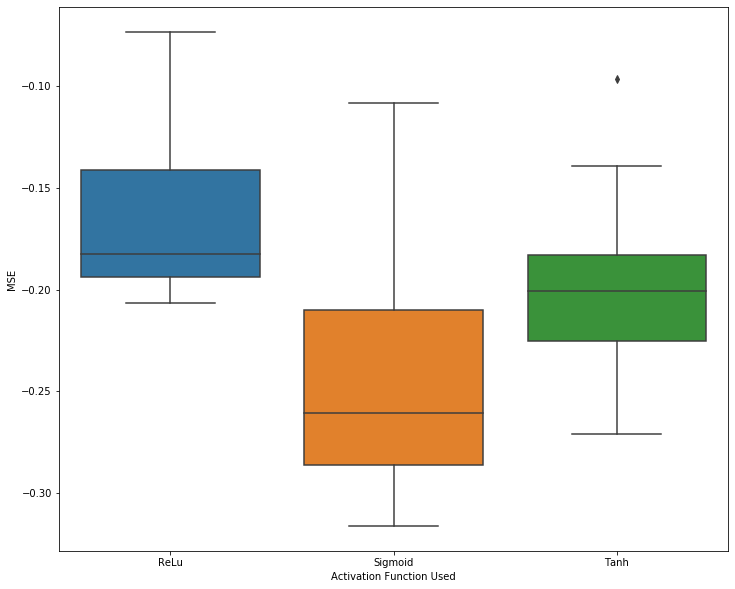

In [298]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = acc_df)
ax.set(ylabel = "MSE", xlabel = "Activation Function Used")
plt.savefig("CV_MSE.png")

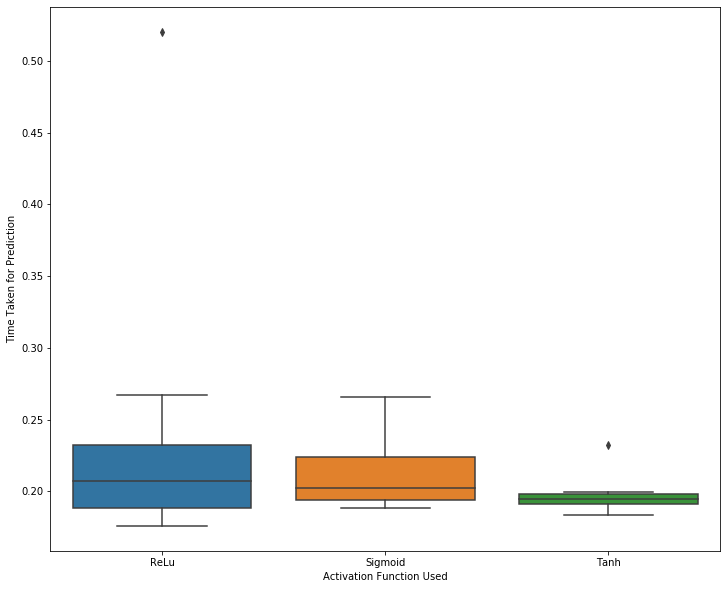

In [299]:
time_df = pd.DataFrame(ac_funcs_score_time)
time_df = time_df.T

time_df = time_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = time_df)
ax.set(ylabel = "Time Taken for Prediction", xlabel = "Activation Function Used")
plt.savefig("14.png")